In [1]:
from stock_utils import *

In [17]:
def get_bollinger_band(moving_average, n, k):
    
    band = np.zeros(len(moving_average))
    for i in range(len(moving_average)):
        if i < n:
            continue ## HACKY -- but ok for now since we won't look at the first n days. no big deal
        band[i] = moving_average[i] + k * np.std(moving_average[i-n:i])
    
    return band

In [27]:
df = pd.DataFrame()
df = df.from_csv('stock_data/fb.csv')
df = df.sort_index(axis=0)

close = get_close_price(df)
sma_20 = get_sma(close, 20)

bband_1 = get_bollinger_band(sma_20, 20, -2)
bband_2 = get_bollinger_band(sma_20, 20, -1)
bband_3 = get_bollinger_band(sma_20, 20, 1)
bband_4 = get_bollinger_band(sma_20, 20, 2)


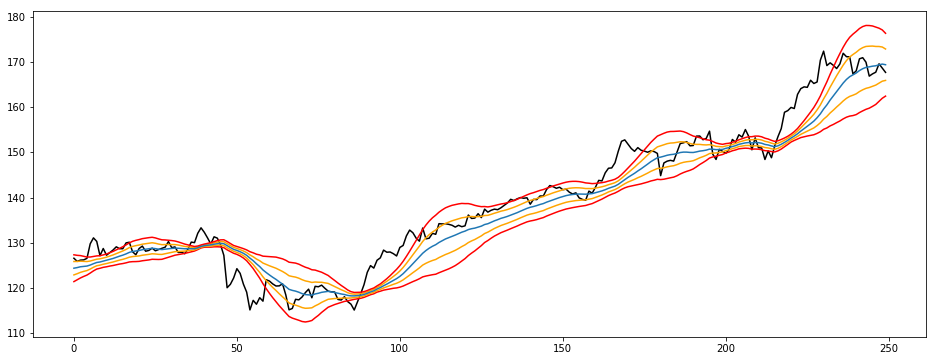

In [30]:
viewing_window = 250

plt.figure(figsize=(16,6))
plt.plot(close[-viewing_window:], c='black')
plt.plot(bband_1[-viewing_window:], c='red')
plt.plot(bband_2[-viewing_window:], c='orange')
plt.plot(bband_3[-viewing_window:], c='orange')
plt.plot(bband_4[-viewing_window:], c='red')
plt.plot(sma_20[-viewing_window:])
plt.show()